In [4]:
#Predict Price of the computer

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pylab
import scipy.stats as st

In [44]:
computer_data=pd.read_csv('A:/Data Science/assignments/Multiple Linear regression/Computer_Data.csv')

In [45]:
computer_data.columns

Index(['Unnamed: 0', 'price', 'speed', 'hd', 'ram', 'screen', 'cd', 'multi',
       'premium', 'ads', 'trend'],
      dtype='object')

In [176]:
computer_data.shape

(6259, 10)

In [49]:
computer_data.isnull().sum()

price      0
speed      0
hd         0
ram        0
screen     0
cd         0
multi      0
premium    0
ads        0
trend      0
dtype: int64

In [48]:
computer_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [50]:
x=computer_data.drop(['price'],axis=1)
y=computer_data.price

In [51]:
computer_data.describe()

,price,speed,hd,ram,screen,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,2219.576610,52.011024,416.601694,8.286947,14.608723,221.301007,15.926985
std,580.803956,21.157735,258.548445,5.631099,0.905115,74.835284,7.873984
min,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000,10.000000
50%,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,21.500000
max,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000


In [52]:
computer_data.dtypes

price       int64
speed       int64
hd          int64
ram         int64
screen      int64
cd         object
multi      object
premium    object
ads         int64
trend       int64
dtype: object

In [53]:
computer_data.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


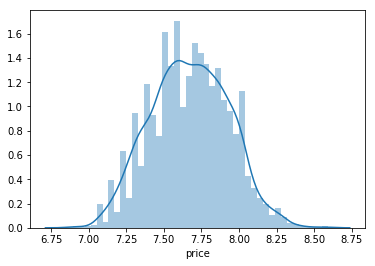

In [54]:
sns.distplot(np.log(computer_data.price))

In [55]:
computer_data.price=np.log(computer_data.price)

In [56]:
computer_data.cd.value_counts()

no     3351
yes    2908
Name: cd, dtype: int64

In [57]:
computer_data.cd=computer_data['cd'].map({'no':0,'yes':1})

In [58]:
computer_data.multi.value_counts()

no     5386
yes     873
Name: multi, dtype: int64

In [59]:
computer_data.multi=computer_data.multi.map({'no':0,'yes':1})

In [60]:
computer_data.premium.value_counts()

yes    5647
no      612
Name: premium, dtype: int64

In [61]:
computer_data.premium=computer_data.premium.map({'no':0,'yes':1})

In [62]:
computer_data.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,7.312553,25,80,4,14,0,0,1,94,1
1,7.492760,33,85,2,14,0,0,1,94,1
2,7.374629,25,170,4,15,0,0,1,94,1
3,7.522400,25,170,8,14,0,0,0,94,1
4,8.100161,33,340,16,14,0,0,1,94,1


In [63]:
computer_data.dtypes

price      float64
speed        int64
hd           int64
ram          int64
screen       int64
cd           int64
multi        int64
premium      int64
ads          int64
trend        int64
dtype: object

In [64]:
computer_data

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,7.312553,25,80,4,14,0,0,1,94,1
1,7.492760,33,85,2,14,0,0,1,94,1
2,7.374629,25,170,4,15,0,0,1,94,1
3,7.522400,25,170,8,14,0,0,0,94,1
4,8.100161,33,340,16,14,0,0,1,94,1
5,8.214736,66,340,16,14,0,0,1,94,1
6,7.450080,25,170,4,14,1,0,1,94,1
7,7.598399,50,85,2,14,0,0,1,94,1
8,7.707512,50,210,8,14,0,0,1,94,1
9,7.853605,50,210,4,15,0,0,1,94,1


In [65]:
computer_data.corr()*100

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
price,100.000000,30.966542,43.019498,62.168729,29.477849,22.679125,-0.057642,-7.481777,5.419918,-19.994773
speed,30.966542,100.000000,37.230410,23.476050,18.907412,25.825980,8.417193,11.420791,-21.523206,40.543833
hd,43.019498,37.230410,100.000000,77.772630,23.280153,50.357041,9.280483,19.692359,-32.322200,57.779013
ram,62.168729,23.476050,77.772630,100.000000,20.895374,43.850441,4.549689,19.714459,-18.166971,27.684384
screen,29.477849,18.907412,23.280153,20.895374,100.000000,12.948766,-0.174041,1.874522,-9.391943,18.861444
cd,22.679125,25.825980,50.357041,43.850441,12.948766,100.000000,43.217930,21.607660,-6.109108,44.578018
multi,-0.057642,8.417193,9.280483,4.549689,-0.174041,43.217930,100.000000,12.477474,-3.039426,21.090743
premium,-7.481777,11.420791,19.692359,19.714459,1.874522,21.607660,12.477474,100.000000,-15.202274,4.210738
ads,5.419918,-21.523206,-32.322200,-18.166971,-9.391943,-6.109108,-3.039426,-15.202274,100.000000,-31.855251
trend,-19.994773,40.543833,57.779013,27.684384,18.861444,44.578018,21.090743,4.210738,-31.855251,100.000000


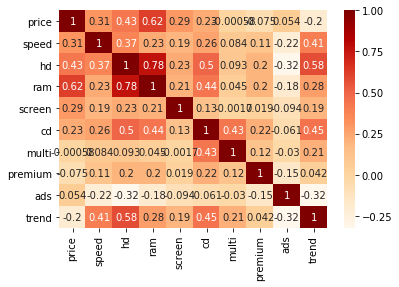

In [66]:
sns.heatmap(computer_data.corr(),cmap='OrRd',annot=True)

In [67]:
x_1=computer_data.drop(['price'],axis=1)
y_1=computer_data.price

In [68]:
#MLR
model_V1=smf.ols('price~ram+hd+speed+trend+premium+ads+screen',data=computer_data).fit()

In [69]:
model_V1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     2983.
Date:                Mon, 25 May 2020   Prob (F-statistic):               0.00
Time:                        13:09:50   Log-Likelihood:                 4192.8
No. Observations:                6259   AIC:                            -8370.
Df Residuals:                    6251   BIC:                            -8316.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8056      0.027    251.667      0.000       6.753       6.859
ram            0.0219      0.000     46.354      0.000       0.021       0.023
hd             0.0003   1.23e-05     28.346      0.000       0.000       0.000
speed          0.0043   8.32e-05     51.620      0.000       0.004       0.004
trend         -0.0220      0.000    -81.526      0.000      -0.023      -0.021
premium       -0.2073      0.005    -38.000      0.000      -0.218      -0.197
ads            0.0003   2.27e-05     14.797      0.000       0.000       0.000
screen         0.0533      0.002     29.643      0.000       0.050       0.057
==============================================================================
Omnibus:                      114.547   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.681
Skew:                          -0.088   Prob(JB):                     7.29e-49
Kurtosis:                       3.905   Cond. No.                     9.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
VIF=pd.DataFrame()

VIF['Factor']=[variance_inflation_factor(x_1.values, i) for i in range(x_1.shape[1])]

VIF['features']=x_1.columns
VIF

,Factor,features
0,8.912021,speed
1,15.125046,hd
2,9.409406,ram
3,36.282936,screen
4,3.442845,cd
5,1.497608,multi
6,10.763429,premium
7,10.969552,ads
8,10.245682,trend


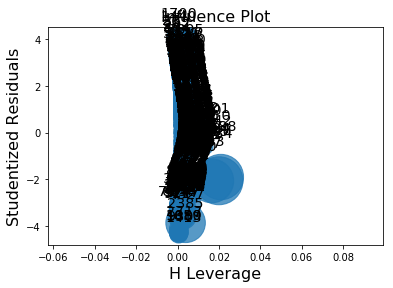

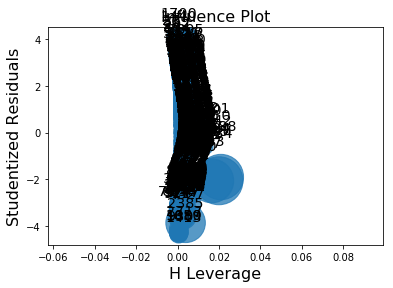

In [72]:
#Check Infulential values
sm.graphics.influence_plot(model_V1)

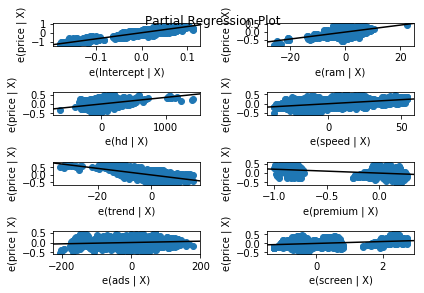

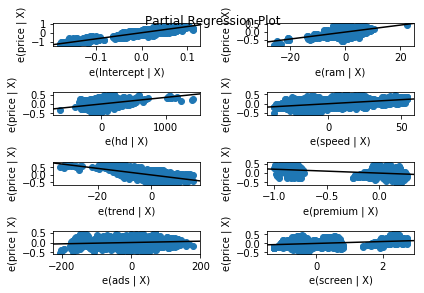

In [73]:
#Infulence variables
sm.graphics.plot_partregress_grid(model_V1)

((array([-3.69316996, -3.46128945, -3.33365932, ...,  3.33365932,
          3.46128945,  3.69316996]),
  array([-4.32563501, -4.29483707, -4.24999046, ...,  3.82155215,
          3.9190169 ,  3.99637549])),
 (0.9956921209726097, 1.5017778787063768e-13, 0.9957855971094329))

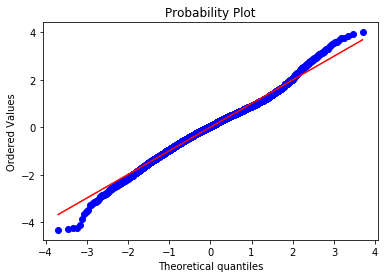

In [74]:
st.probplot(model_V1.resid_pearson,dist='norm',plot=pylab)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f84accb518>,
 'caps': [<matplotlib.lines.Line2D at 0x1f84ad10940>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f84ad06b70>],
 'medians': [<matplotlib.lines.Line2D at 0x1f84ad10e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f84ad175f8>],
 'means': []}

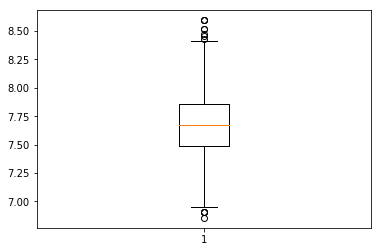

In [75]:
plt.boxplot(computer_data.price)

In [76]:
predict_pr=model_V1.predict(x_1)

In [77]:
model_V1.resid_pearson

array([-2.13625502, -0.61952727, -2.31924625, ..., -1.06321496,
       -0.19392157, -0.03682202])

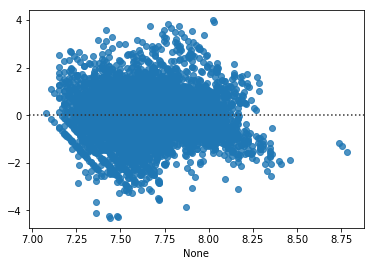

In [78]:
sns.residplot(predict_pr,model_V1.resid_pearson)

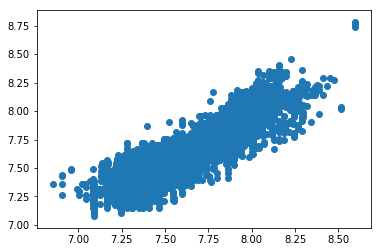

In [73]:
plt.scatter(y_1,predict_pr)

(array([  10.,   34.,  210.,  676., 1649., 2223., 1113.,  246.,   78.,
          20.]),
 array([-4.32563501, -3.49343396, -2.66123291, -1.82903186, -0.99683081,
        -0.16462976,  0.66757129,  1.49977234,  2.33197339,  3.16417444,
         3.99637549]),
 <a list of 10 Patch objects>)

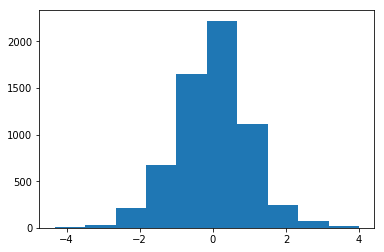

In [75]:
plt.hist(model_V1.resid_pearson)

((array([-3.69316996, -3.46128945, -3.33365932, ...,  3.33365932,
          3.46128945,  3.69316996]),
  array([-4.32563501, -4.29483707, -4.24999046, ...,  3.82155215,
          3.9190169 ,  3.99637549])),
 (0.9956921209726097, 1.5017778787063768e-13, 0.9957855971094329))

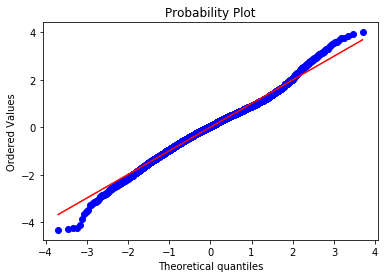

In [77]:
st.probplot(model_V1.resid_pearson,dist='norm',plot=pylab)

In [81]:
#MLR
#Removing screen because of multicollineariy issue.
model_V2=smf.ols('price~ram+hd+speed+trend+premium+ads',data=computer_data).fit()
model_V2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     2923.
Date:                Mon, 25 May 2020   Prob (F-statistic):               0.00
Time:                        13:24:18   Log-Likelihood:                 3781.2
No. Observations:                6259   AIC:                            -7548.
Df Residuals:                    6252   BIC:                            -7501.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5575      0.010    754.602      0.000       7.538       7.577
ram            0.0230      0.001     45.660      0.000       0.022       0.024
hd             0.0004   1.32e-05     27.315      0.000       0.000       0.000
speed          0.0045   8.84e-05     51.440      0.000       0.004       0.005
trend         -0.0215      0.000    -74.850      0.000      -0.022      -0.021
premium       -0.2129      0.006    -36.552      0.000      -0.224      -0.201
ads            0.0003   2.42e-05     13.564      0.000       0.000       0.000
==============================================================================
Omnibus:                      117.220   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.574
Skew:                           0.007   Prob(JB):                     7.79e-54
Kurtosis:                       3.968   Cond. No.                     3.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Accuracy is 73%